In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt

# 12 Lorenz Model


## funcation

In [2]:
sigma = 10
b = 8/3
r = 28

def dxyz(x,y,z):
    dx = sigma*(y-x)
    dy = r*x - y - x*z
    dz = x*y - b*z
    return [dx, dy, dz]

def fourthRungeKutte(xyz,h, step):
    label = 'R-K 4th oder'
    t_var = [0]
    x_var = [xyz[0]]
    y_var = [xyz[1]]
    z_var = [xyz[2]]

    for i in np.arange(0, step):
        k1 = dxyz(x=x_var[-1], y=y_var[-1], z=z_var[-1])
        k2 = dxyz(x_var[-1]+(h/2)*k1[0], y_var[-1]+(h/2)*k1[1],z_var[-1]+(h/2)*k1[2])
        k3 = dxyz(x_var[-1]+(h/2)*k2[0], y_var[-1]+(h/2)*k2[1],z_var[-1]+(h/2)*k2[2])
        k4 = dxyz(x_var[-1]+h*k3[0], y_var[-1]+h*k3[1],z_var[-1]+h*k3[2])
        x_var.append(x_var[-1]+(h/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0]))
        y_var.append(y_var[-1]+(h/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1]))
        z_var.append(z_var[-1]+(h/6)*(k1[2]+2*k2[2]+2*k3[2]+k4[2]))
        t_var.append(t_var[-1]+h)
    fRungeKutte = [x_var, y_var, z_var, label, t_var]
    return fRungeKutte


## figure

### 1D x-t

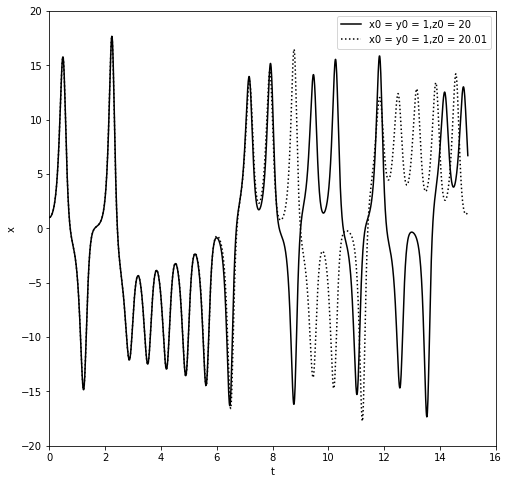

In [7]:
a0 = [1,1,20]   #xyz[x0,y0,z0]
a1 = [1,1,20.01]
lM0 = fourthRungeKutte(xyz=a0,h=0.01,step=1500)
lM1 = fourthRungeKutte(xyz=a1, h=0.01, step=1500)

fig = plt.figure(figsize=(8,8))
plt.plot(lM0[4],lM0[0],'k',label='x0 = y0 = 1,z0 = 20')
plt.plot(lM1[4], lM1[0], ':k', label='x0 = y0 = 1,z0 = 20.01')
plt.legend()
plt.xlim([0,16])
plt.ylim([-20,20])
plt.xlabel('t')
plt.ylabel('x')
plt.savefig('LorenzModel_1Dt.jpeg',dpi=200)

### 3D x-y-z

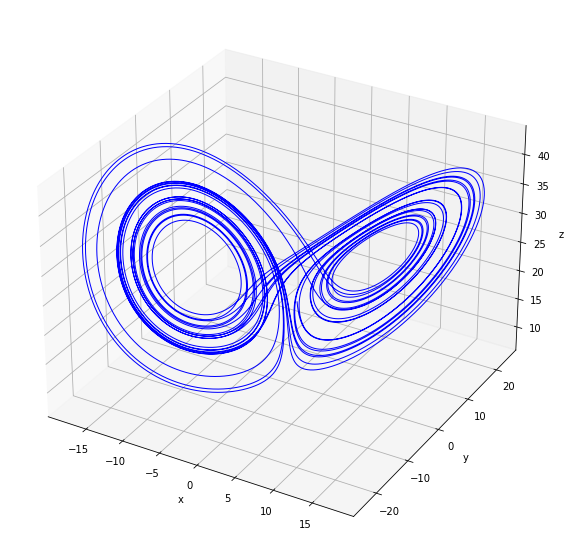

In [4]:
lM3 = fourthRungeKutte(xyz=a1, h=0.001, step=30000)

ax = plt.figure(figsize=[10,10]).add_subplot(projection='3d')
ax.plot(lM3[0],lM3[1],lM3[2],'b', lw=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.savefig('LorenzModel_3D.jpeg',dpi=200)
